In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/few_shot_learning/../..']

In [2]:
!pip install seaborn==0.13.0


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path
import textwrap
from sklearn.metrics import roc_curve, accuracy_score, f1_score, auc, precision_recall_curve, precision_score, recall_score
from statistics import mean
from src.utils import utils, evaluation_utils, visualization_utils

In [4]:
dataset_file_path = os.path.join(os.getcwd(), "..","..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
unseen_hosts_file_path = os.path.join(os.getcwd(), "..","..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv_unseen_hosts.csv")
seen_hosts_file_path = os.path.join(os.getcwd(), "..","..", "..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv_seen_hosts.csv")

In [5]:
def compute_class_distribution(df, label_col, n, idv_seen_hosts, format=False):
    labels_counts = df[label_col].value_counts()
    print(labels_counts)
    labels_counts = labels_counts / n * 100
    labels_counts = labels_counts.to_dict()
    if format:
        labels_counts = {k: f"{k}\n(n={int(v/100*n)}, {v:.3f}%)" for k, v, in labels_counts.items()}
        
        for k, v in labels_counts.items():
            if k in idv_seen_hosts:
                labels_counts[k] = "*" + v
    return labels_counts

In [6]:
dataset_df = pd.read_csv(dataset_file_path)

In [7]:
idv_seen_hosts = set(pd.read_csv(seen_hosts_file_path)["virus_host_name"].unique())
idv_unseen_hosts = set(pd.read_csv(unseen_hosts_file_path)["virus_host_name"].unique())

In [8]:
metadata_formatted = compute_class_distribution(dataset_df, "virus_host_name", n=220068, idv_seen_hosts=idv_seen_hosts, format=True)
metadata_formatted

virus_host_name
Homo sapiens                          218631
Macaca mulatta                           849
Felis catus                              143
Cercocebus atys                          122
Puma concolor                             24
Macaca nemestrina                         23
Mandrillus sphinx                         23
Mandrillus leucophaeus                    20
Cercopithecus nictitans                   19
Cercopithecus solatus                     17
Cercocebus torquatus                      16
Cercopithecus aethiops                    14
Colobus guereza                           13
Cercopithecus cephus                      13
Chlorocebus sabaeus                       13
Cercopithecus neglectus                   12
Panthera leo                              12
Chlorocebus tantalus                      10
Cercopithecus mona                        10
Felis silvestris catus                     9
Cercopithecus lhoesti                      8
Chlorocebus pygerythrus                

{'Homo sapiens': '*Homo sapiens\n(n=218631, 99.347%)',
 'Macaca mulatta': '*Macaca mulatta\n(n=849, 0.386%)',
 'Felis catus': '*Felis catus\n(n=143, 0.065%)',
 'Cercocebus atys': 'Cercocebus atys\n(n=122, 0.055%)',
 'Puma concolor': 'Puma concolor\n(n=24, 0.011%)',
 'Macaca nemestrina': 'Macaca nemestrina\n(n=23, 0.010%)',
 'Mandrillus sphinx': '*Mandrillus sphinx\n(n=23, 0.010%)',
 'Mandrillus leucophaeus': 'Mandrillus leucophaeus\n(n=20, 0.009%)',
 'Cercopithecus nictitans': 'Cercopithecus nictitans\n(n=19, 0.009%)',
 'Cercopithecus solatus': 'Cercopithecus solatus\n(n=17, 0.008%)',
 'Cercocebus torquatus': 'Cercocebus torquatus\n(n=16, 0.007%)',
 'Cercopithecus aethiops': 'Cercopithecus aethiops\n(n=14, 0.006%)',
 'Colobus guereza': 'Colobus guereza\n(n=13, 0.006%)',
 'Cercopithecus cephus': 'Cercopithecus cephus\n(n=13, 0.006%)',
 'Chlorocebus sabaeus': 'Chlorocebus sabaeus\n(n=13, 0.006%)',
 'Cercopithecus neglectus': 'Cercopithecus neglectus\n(n=12, 0.005%)',
 'Panthera leo': 'Pa

In [9]:
metadata_unformatted = compute_class_distribution(dataset_df, "virus_host_name", n=220068, idv_seen_hosts=idv_seen_hosts, format=False)
metadata_unformatted

virus_host_name
Homo sapiens                          218631
Macaca mulatta                           849
Felis catus                              143
Cercocebus atys                          122
Puma concolor                             24
Macaca nemestrina                         23
Mandrillus sphinx                         23
Mandrillus leucophaeus                    20
Cercopithecus nictitans                   19
Cercopithecus solatus                     17
Cercocebus torquatus                      16
Cercopithecus aethiops                    14
Colobus guereza                           13
Cercopithecus cephus                      13
Chlorocebus sabaeus                       13
Cercopithecus neglectus                   12
Panthera leo                              12
Chlorocebus tantalus                      10
Cercopithecus mona                        10
Felis silvestris catus                     9
Cercopithecus lhoesti                      8
Chlorocebus pygerythrus                

{'Homo sapiens': 99.34702001199629,
 'Macaca mulatta': 0.3857898467746333,
 'Felis catus': 0.0649799152989076,
 'Cercocebus atys': 0.05543741025501209,
 'Puma concolor': 0.010905720050166313,
 'Macaca nemestrina': 0.01045131504807605,
 'Mandrillus sphinx': 0.01045131504807605,
 'Mandrillus leucophaeus': 0.009088100041805259,
 'Cercopithecus nictitans': 0.008633695039714997,
 'Cercopithecus solatus': 0.007724885035534471,
 'Cercocebus torquatus': 0.0072704800334442085,
 'Cercopithecus aethiops': 0.0063616700292636824,
 'Colobus guereza': 0.005907265027173419,
 'Cercopithecus cephus': 0.005907265027173419,
 'Chlorocebus sabaeus': 0.005907265027173419,
 'Cercopithecus neglectus': 0.005452860025083156,
 'Panthera leo': 0.005452860025083156,
 'Chlorocebus tantalus': 0.0045440500209026295,
 'Cercopithecus mona': 0.0045440500209026295,
 'Felis silvestris catus': 0.004089645018812368,
 'Cercopithecus lhoesti': 0.0036352400167221043,
 'Chlorocebus pygerythrus': 0.0031808350146318412,
 'Cercopit

In [10]:
metadata_formatted_reverse = {v: k for k, v in metadata_formatted.items()}
metadata_formatted_reverse

{'*Homo sapiens\n(n=218631, 99.347%)': 'Homo sapiens',
 '*Macaca mulatta\n(n=849, 0.386%)': 'Macaca mulatta',
 '*Felis catus\n(n=143, 0.065%)': 'Felis catus',
 'Cercocebus atys\n(n=122, 0.055%)': 'Cercocebus atys',
 'Puma concolor\n(n=24, 0.011%)': 'Puma concolor',
 'Macaca nemestrina\n(n=23, 0.010%)': 'Macaca nemestrina',
 '*Mandrillus sphinx\n(n=23, 0.010%)': 'Mandrillus sphinx',
 'Mandrillus leucophaeus\n(n=20, 0.009%)': 'Mandrillus leucophaeus',
 'Cercopithecus nictitans\n(n=19, 0.009%)': 'Cercopithecus nictitans',
 'Cercopithecus solatus\n(n=17, 0.008%)': 'Cercopithecus solatus',
 'Cercocebus torquatus\n(n=16, 0.007%)': 'Cercocebus torquatus',
 'Cercopithecus aethiops\n(n=14, 0.006%)': 'Cercopithecus aethiops',
 'Colobus guereza\n(n=13, 0.006%)': 'Colobus guereza',
 'Cercopithecus cephus\n(n=13, 0.006%)': 'Cercopithecus cephus',
 'Chlorocebus sabaeus\n(n=13, 0.006%)': 'Chlorocebus sabaeus',
 'Cercopithecus neglectus\n(n=12, 0.005%)': 'Cercopithecus neglectus',
 'Panthera leo\n(n=1

In [11]:
classes = list(metadata_unformatted.keys())
classes

['Homo sapiens',
 'Macaca mulatta',
 'Felis catus',
 'Cercocebus atys',
 'Puma concolor',
 'Macaca nemestrina',
 'Mandrillus sphinx',
 'Mandrillus leucophaeus',
 'Cercopithecus nictitans',
 'Cercopithecus solatus',
 'Cercocebus torquatus',
 'Cercopithecus aethiops',
 'Colobus guereza',
 'Cercopithecus cephus',
 'Chlorocebus sabaeus',
 'Cercopithecus neglectus',
 'Panthera leo',
 'Chlorocebus tantalus',
 'Cercopithecus mona',
 'Felis silvestris catus',
 'Cercopithecus lhoesti',
 'Chlorocebus pygerythrus',
 'Cercopithecus mitis',
 'Macaca fascicularis',
 'Felis domesticus',
 'Macaca arctoides',
 'Semnopithecus entellus',
 'Cercopithecus erythrotis',
 'Cercopithecus ascanius',
 'Bos taurus',
 'Miopithecus ogouensis',
 'Cercocebus torquatus atys',
 'Cercopithecus aethiops pygerythrus',
 'Lynx rufus',
 'Piliocolobus badius',
 'Piliocolobus tephrosceles',
 'Panthera pardus',
 'Papio ursinus',
 'Otocolobus manul',
 'Procolobus verus']

In [12]:
# filter the classes to include the classes in output


In [13]:
classes_order = {k:i for i, k in enumerate(classes)}
class_formatted_order = {val: classes_order[key] for key, val in metadata_formatted.items()}
print(classes_order)
print(class_formatted_order)

{'Homo sapiens': 0, 'Macaca mulatta': 1, 'Felis catus': 2, 'Cercocebus atys': 3, 'Puma concolor': 4, 'Macaca nemestrina': 5, 'Mandrillus sphinx': 6, 'Mandrillus leucophaeus': 7, 'Cercopithecus nictitans': 8, 'Cercopithecus solatus': 9, 'Cercocebus torquatus': 10, 'Cercopithecus aethiops': 11, 'Colobus guereza': 12, 'Cercopithecus cephus': 13, 'Chlorocebus sabaeus': 14, 'Cercopithecus neglectus': 15, 'Panthera leo': 16, 'Chlorocebus tantalus': 17, 'Cercopithecus mona': 18, 'Felis silvestris catus': 19, 'Cercopithecus lhoesti': 20, 'Chlorocebus pygerythrus': 21, 'Cercopithecus mitis': 22, 'Macaca fascicularis': 23, 'Felis domesticus': 24, 'Macaca arctoides': 25, 'Semnopithecus entellus': 26, 'Cercopithecus erythrotis': 27, 'Cercopithecus ascanius': 28, 'Bos taurus': 29, 'Miopithecus ogouensis': 30, 'Cercocebus torquatus atys': 31, 'Cercopithecus aethiops pygerythrus': 32, 'Lynx rufus': 33, 'Piliocolobus badius': 34, 'Piliocolobus tephrosceles': 35, 'Panthera pardus': 36, 'Papio ursinus':

In [14]:
dataset_df["virus_host_name"].nunique()

40

In [15]:
import math

def get_uniformly_divided_position_bins(positions, n_bins):
    bin_width = math.floor(len(positions)/n_bins)
    bins = []
    start = 0
    for i in range(n_bins):
        end = start + bin_width
        bins.append(positions[start:end])
        start = end
    return bins

In [16]:
def get_rank(row, all_output_labels):
    y_true = row["y_true"]
    ranks = row[all_output_labels].rank(ascending=False, method="min")
    return ranks[y_true]

def plot_rank_distribution(df):
    plt.clf()
    plt.figure(figsize=(10, 10))
    sns.set_theme()
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams.update({'font.size': 16})
    ax = sns.displot(df, x="y_true_rank", hue="y_true", kind="kde", fill=True)
    ax.set_xlabel("Rank based on Probability", fontsize=20)
    sns.move_legend(ax, "upper right", bbox_to_anchor=(1.3, 1))

   # plt.legend(title="Classes", loc="upper right", fontsize=10)
    plt.show()

        
def plot_probability_distribution(class_prob_df, random_predictor, idv_seen_hosts, idv_unseen_hosts, output_file_path=None):
    n = len(rank_bins)
    # color_palette = sns.color_palette("ch:s=.25,rot=-.25_r", n_colors=n)
    color_palette = sns.color_palette("YlOrBr_r", n_colors=n)
    
    plt.clf()
    fig, ax = plt.subplots(1, 2, figsize=(20, 20), sharey=True)
    sns.set_theme(style="whitegrid")
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['hatch.linewidth'] = 3
    plt.rcParams['hatch.color'] = "k" 
    plt.rcParams.update({'font.size': 20})
    class_prob_df.sort_values(by="class", key=lambda x: x.map(class_formatted_order), inplace=True)
    class_prob_df_hosts = list(class_prob_df["class"].unique())
    n_class_prob_df_hosts = len(class_prob_df_hosts)
    print(f"class_prob_df_hosts = {class_prob_df_hosts}")
    print(f"number of class_prob_df_hosts = {len(class_prob_df_hosts)}")
    
    sns.stripplot(data=class_prob_df, x="probability", y="class", hue="y_true_rank_bin",
                  palette=color_palette, hue_order=rank_bins, ax=ax[0], legend=False, size=10,
                 linewidth=.3)
    ax[0].axvline(random_predictor, color="gray", linestyle="--", linewidth=2)
    ax[0].set_ylabel("", fontsize=20)
    ax[0].set_xlabel("True Class Probability", fontsize=22)
    ax[0].set_xlim(0, 1)

    barplot_df = pd.crosstab(class_prob_df["class"], class_prob_df["y_true_rank_bin"], normalize="index")[rank_bins].cumsum(axis=1).stack().reset_index().rename(columns={0:"proportion"})
    barplot_df["percent"] = barplot_df["proportion"]*100

    sns.barplot(data=barplot_df, x="percent", y="class", hue="y_true_rank_bin", dodge=False, palette=color_palette[::-1], hue_order=rank_bins[::-1], ax=ax[1], edgecolor="k")
    ax[1].set_xlabel("Rank Distribution (%)", fontsize=22)
    
    # get indices of seen hosts
#     seen_host_indices = []
#     for seen_host in idv_seen_hosts:
#         seen_host_indices.append(class_prob_df_hosts.index(metadata_formatted[seen_host]))
        
#     print(f"Number of patches = {len(ax[1].patches)}")
    
#     for i in seen_host_indices:
#         for j in range(0, n):
#             ax[1].patches[j*n_class_prob_df_hosts + i].set_hatch("//")
#             #ax[1].patches[j*n_class_prob_df_hosts + i].set_facecolor(color_palette_seen[j])


    plt.legend(title="Prediction", loc="upper right", fontsize=22)
    #sns.move_legend(ax[0], "lower center", ncol=6, title=None, bbox_to_anchor=(.9, 1), fontsize=16)
    sns.move_legend(ax[1], "lower center", ncol=6, title=None, bbox_to_anchor=(-0.08, 1), fontsize=16)
    plt.subplots_adjust(wspace = 0.05)
    if output_file_path:
        plt.savefig(output_file_path, bbox_inches="tight")
    plt.show()
    
    
def analyze_all_way_fsl_results(output_file_path, auprc_file_path):
    output_auprc_df = pd.read_csv(auprc_file_path, index_col=0)
    output_df = pd.read_csv(output_file_path, index_col=0)
    print(f"Number of unique classes in output_df = {output_auprc_df['class'].nunique()}")
    
    all_output_labels = list(output_df.columns)
    all_output_labels.remove("itr")
    all_output_labels.remove("y_true")
    print(f"Number of unique labels in output_df = {len(all_output_labels)}")
    
    sub_df = output_df[output_df["itr"] == 0]
    sub_df.drop(columns="itr", inplace=True)
    sub_df["y_true_rank"] = sub_df.apply(lambda x: get_rank(x, all_output_labels), axis=1)
    sub_df["y_true_rank_bin"] = sub_df.apply(get_rank_bin, axis=1)
    
    #plot_rank_distribution(sub_df.replace({"y_true": metadata_formatted}))
    
    print(f"Number of Unseen IDV hosts  =  {len(idv_unseen_hosts)}")
    print(f"Number of Seen IDV hosts  =  {len(idv_seen_hosts)}")
    
    output_df["y_pred"] = output_df[all_output_labels].idxmax(axis=1)
        
    classwise_prob_dfs = []
    
    for label in all_output_labels:
        class_prob_df = sub_df[[label, "y_true", "y_true_rank_bin", "y_true_rank"]][sub_df["y_true"] == label]
        class_prob_df = class_prob_df.rename(columns={label: "probability", "y_true": "class"})
        classwise_prob_dfs.append(class_prob_df)

    class_prob_df = pd.concat(classwise_prob_dfs)
    class_prob_df.replace({"class": metadata_formatted}, inplace=True)
    
    #plot_probability_distribution(class_prob_df, 1/len(all_output_labels))
    return class_prob_df, 1/len(all_output_labels), idv_seen_hosts, idv_unseen_hosts


### Unseen hosts

#### 167-way

In [30]:
#output_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_unseen_hosts/20241010/host_multi/few_shot_learning/fsl_tr_w3s5q10_ev_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
#auprc_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_unseen_hosts/20241010/host_multi/few_shot_learning/fsl_tr_w3s5q10_ev_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_classwise_auprc.csv")
output_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241022/host_multi/few_shot_learning/fsl_tr_w3s5q10_ev_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
auprc_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241022/host_multi/few_shot_learning/fsl_tr_w3s5q10_ev_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_classwise_auprc.csv")


In [31]:
def get_rank_bin(row):
    rank = row["y_true_rank"]
    if rank == 1:
        return "Correct Prediction"
    elif rank <= 5:
        return "Top 5 ranks"
    elif rank <= 10:
        return "Top 10 ranks"
    elif rank <= 15:
        return "Top 15 ranks"
    elif rank <= 20:
        return "Top 20 ranks"
    else:
        return "Rank > 20"
    
rank_bins = ["Correct Prediction", "Top 5 ranks", "Top 10 ranks", "Top 15 ranks", "Top 20 ranks", "Rank > 20"]

In [32]:
class_prob_df, random_predictor, idv_seen_hosts, idv_unseen_hosts = analyze_all_way_fsl_results(output_file_path, auprc_file_path)

Number of unique classes in output_df = 167
Number of unique labels in output_df = 167


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_2843240/512126311.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["y_true_rank"] = sub_df.apply(lambda x: get_rank(x, all_output_labels), axis=1)
/tmp/ipykernel_2843240/512126311.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Number of Unseen IDV hosts  =  32
Number of Seen IDV hosts  =  8


In [33]:
class_prob_df

,probability,class,y_true_rank_bin,y_true_rank
0,0.000835,"*Bos taurus\n(n=4, 0.002%)",Rank > 20,107.0
1,0.004384,"*Bos taurus\n(n=4, 0.002%)",Rank > 20,72.0
2,0.004233,"*Bos taurus\n(n=4, 0.002%)",Rank > 20,76.0
3,0.004443,"*Bos taurus\n(n=4, 0.002%)",Rank > 20,59.0
4,0.012118,"Cercocebus atys\n(n=122, 0.055%)",Top 20 ranks,16.0
...,...,...,...,...
219933,0.019005,"Puma concolor\n(n=24, 0.011%)",Top 15 ranks,15.0
219934,0.106336,"Puma concolor\n(n=24, 0.011%)",Correct Prediction,1.0
219935,0.044925,"Puma concolor\n(n=24, 0.011%)",Top 5 ranks,3.0
219936,0.029375,"Puma concolor\n(n=24, 0.011%)",Top 5 ranks,5.0


class_prob_df_hosts = ['*Homo sapiens\n(n=218631, 99.347%)', '*Macaca mulatta\n(n=849, 0.386%)', '*Felis catus\n(n=143, 0.065%)', 'Cercocebus atys\n(n=122, 0.055%)', 'Puma concolor\n(n=24, 0.011%)', 'Macaca nemestrina\n(n=23, 0.010%)', '*Mandrillus sphinx\n(n=23, 0.010%)', 'Mandrillus leucophaeus\n(n=20, 0.009%)', 'Cercopithecus nictitans\n(n=19, 0.009%)', 'Cercopithecus solatus\n(n=17, 0.008%)', 'Cercocebus torquatus\n(n=16, 0.007%)', 'Cercopithecus aethiops\n(n=14, 0.006%)', 'Cercopithecus cephus\n(n=13, 0.006%)', 'Chlorocebus sabaeus\n(n=13, 0.006%)', 'Colobus guereza\n(n=13, 0.006%)', 'Panthera leo\n(n=12, 0.005%)', 'Cercopithecus neglectus\n(n=12, 0.005%)', 'Cercopithecus mona\n(n=10, 0.005%)', 'Chlorocebus tantalus\n(n=10, 0.005%)', 'Felis silvestris catus\n(n=9, 0.004%)', 'Cercopithecus lhoesti\n(n=8, 0.004%)', 'Chlorocebus pygerythrus\n(n=7, 0.003%)', 'Cercopithecus mitis\n(n=6, 0.003%)', '*Felis domesticus\n(n=5, 0.002%)', '*Macaca arctoides\n(n=5, 0.002%)', '*Macaca fascicula

<Figure size 432x288 with 0 Axes>

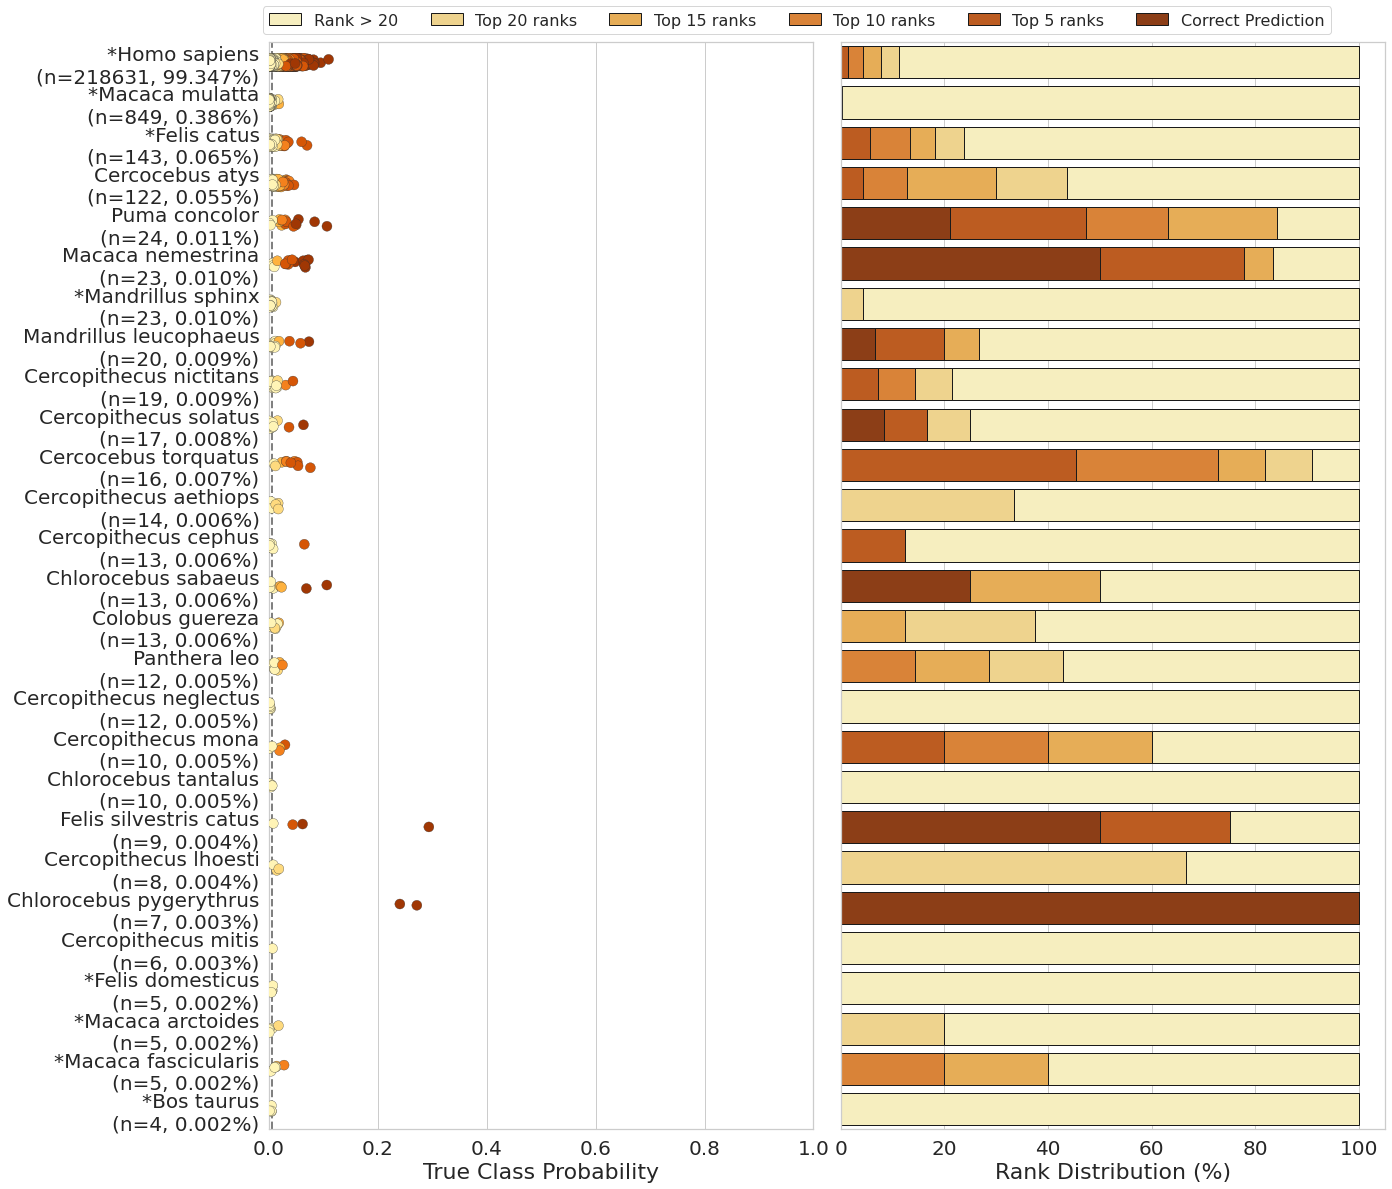

In [36]:
plot_probability_distribution(class_prob_df, random_predictor, idv_seen_hosts, idv_unseen_hosts, output_file_path = os.path.join(os.getcwd(),  "..", "..", "..", f"output/visualization/temp_new/idv_fsl_167way.png"))

#### 23-way

In [17]:
#output_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_unseen_hosts/20241010/host_multi/few_shot_learning/fsl_tr_w5s3q10_te_walls3q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
#auprc_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_unseen_hosts/20241010/host_multi/few_shot_learning/fsl_tr_w5s3q10_te_walls3q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_classwise_auprc.csv")
output_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241022/host_multi/few_shot_learning/fsl_tr_w3s5q10_te_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
auprc_file_path =  os.path.join(os.getcwd(), "..","..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241022/host_multi/few_shot_learning/fsl_tr_w3s5q10_te_walls5q-1_tsk1e1b16itr5_split70-10-20-gpu2_hybrid-attention_sl256st64vs30_ae_bn_fnn_2l_d1024_lr1e-4_classwise_auprc.csv")

In [19]:
def get_rank_bin(row):
    rank = row["y_true_rank"]
    if rank == 1:
        return "Correct Prediction"
    elif rank <= 3:
        return "Top 3 ranks"
    elif rank <= 5:
        return "Top 5 ranks"
    elif rank <= 10:
        return "Top 10 ranks"
    else:
        return "Rank > 10"
    
rank_bins = ["Correct Prediction", "Top 3 ranks", "Top 5 ranks", "Top 10 ranks", "Rank > 10"]
class_prob_df_23way, random_predictor_23way, idv_seen_hosts, idv_unseen_hosts = analyze_all_way_fsl_results(output_file_path, auprc_file_path)

Number of unique classes in output_df = 23
Number of unique labels in output_df = 23


/tmp/ipykernel_3600026/512126311.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns="itr", inplace=True)
/tmp/ipykernel_3600026/512126311.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["y_true_rank"] = sub_df.apply(lambda x: get_rank(x, all_output_labels), axis=1)
/tmp/ipykernel_3600026/512126311.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Number of Unseen IDV hosts  =  32
Number of Seen IDV hosts  =  8


class_prob_df_hosts = ['*Homo sapiens\n(n=218631, 99.347%)', '*Macaca mulatta\n(n=849, 0.386%)', '*Felis catus\n(n=143, 0.065%)', 'Cercocebus atys\n(n=122, 0.055%)', 'Puma concolor\n(n=24, 0.011%)', 'Macaca nemestrina\n(n=23, 0.010%)', '*Mandrillus sphinx\n(n=23, 0.010%)', 'Mandrillus leucophaeus\n(n=20, 0.009%)', 'Cercopithecus nictitans\n(n=19, 0.009%)', 'Cercopithecus solatus\n(n=17, 0.008%)', 'Cercocebus torquatus\n(n=16, 0.007%)', 'Cercopithecus aethiops\n(n=14, 0.006%)', 'Colobus guereza\n(n=13, 0.006%)', 'Cercopithecus cephus\n(n=13, 0.006%)', 'Chlorocebus sabaeus\n(n=13, 0.006%)', 'Cercopithecus neglectus\n(n=12, 0.005%)', 'Panthera leo\n(n=12, 0.005%)', 'Chlorocebus tantalus\n(n=10, 0.005%)', 'Cercopithecus mona\n(n=10, 0.005%)', 'Felis silvestris catus\n(n=9, 0.004%)', 'Cercopithecus lhoesti\n(n=8, 0.004%)', 'Chlorocebus pygerythrus\n(n=7, 0.003%)', 'Cercopithecus mitis\n(n=6, 0.003%)']
number of class_prob_df_hosts = 23


/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Figure size 640x480 with 0 Axes>

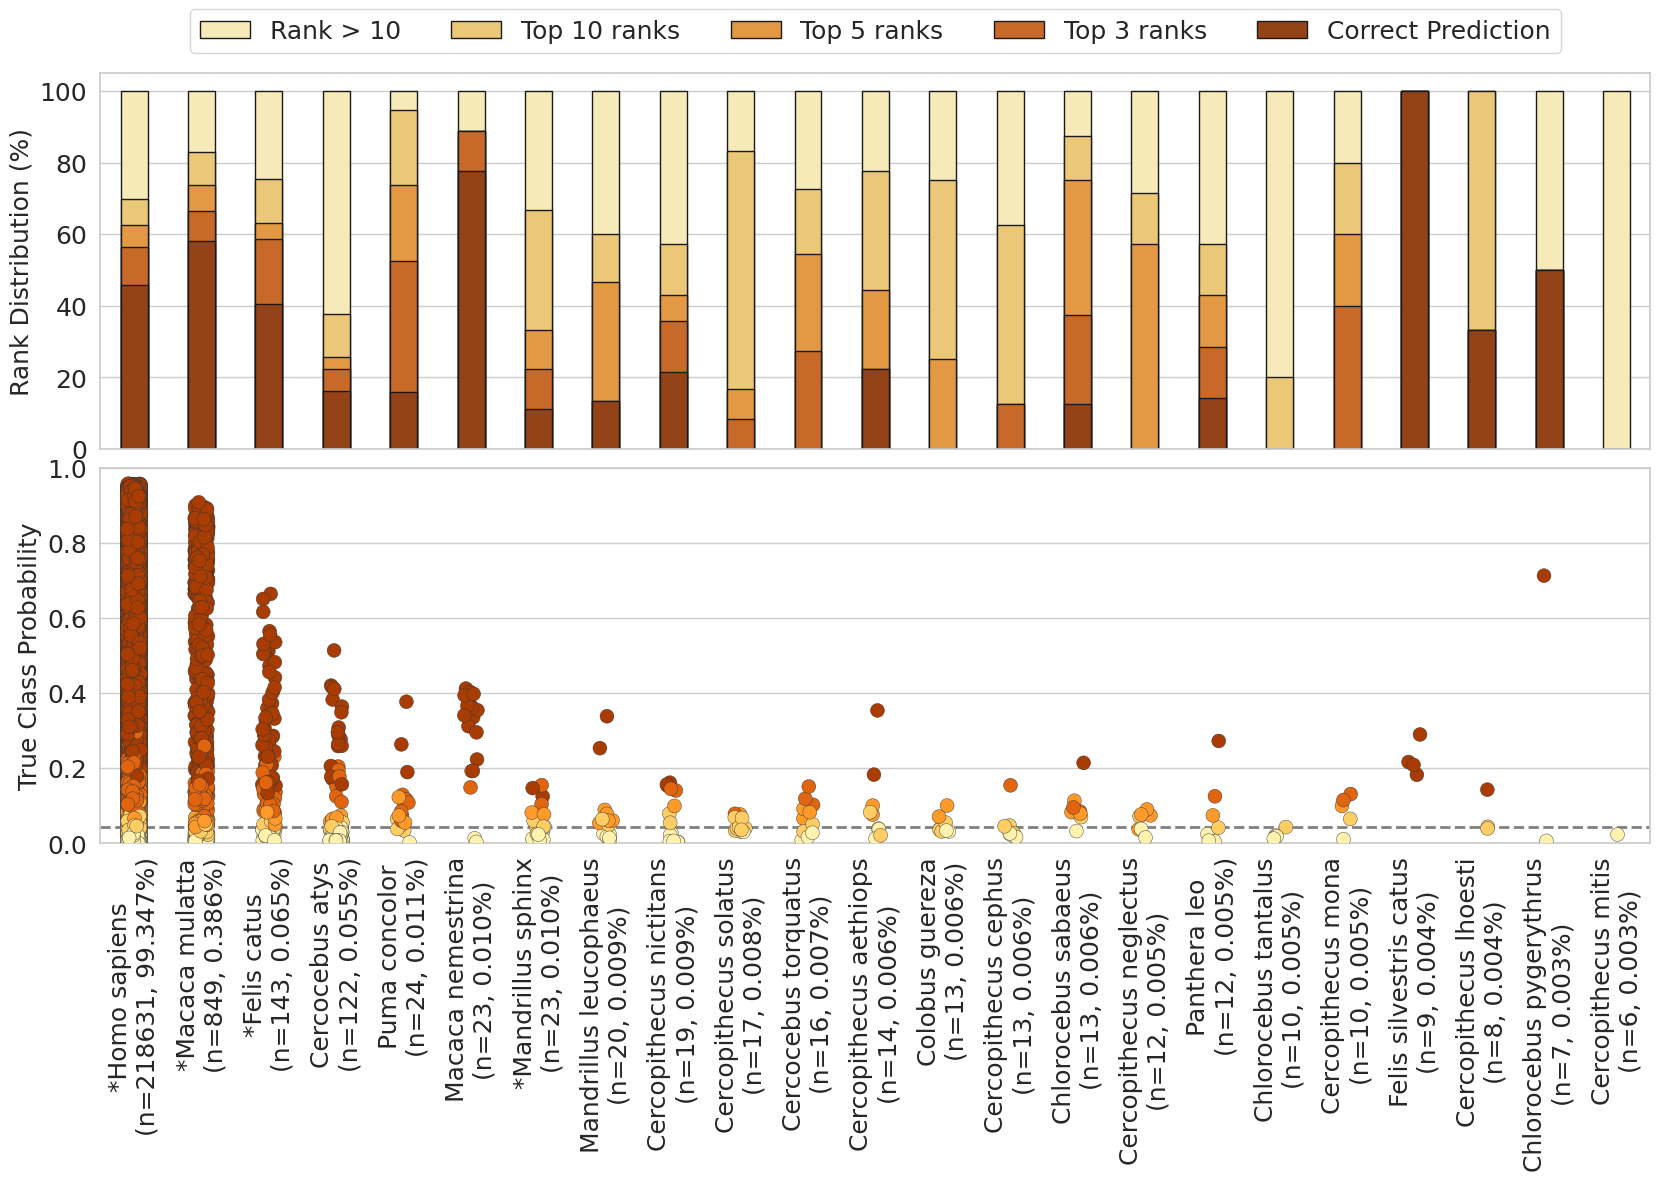

In [54]:
plot_probability_distribution_vertical(class_prob_df_23way, random_predictor_23way, idv_seen_hosts, idv_unseen_hosts, output_file_path = os.path.join(os.getcwd(), "..", "..", "..", f"output/visualization/temp_new/idv_fsl_23way_landscape.pdf"))

In [53]:
def plot_probability_distribution_vertical(class_prob_df, random_predictor, idv_seen_hosts, idv_unseen_hosts, output_file_path=None):
    n = len(rank_bins)
    # color_palette = sns.color_palette("ch:s=.25,rot=-.25_r", n_colors=n)
    color_palette = sns.color_palette("YlOrBr_r", n_colors=n)
    
    plt.clf()
    fig, ax = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    sns.set_theme(style="whitegrid")
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['hatch.linewidth'] = 3
    plt.rcParams['hatch.color'] = "k" 
    plt.rcParams.update({'font.size': 18})
    class_prob_df.sort_values(by="class", key=lambda x: x.map(class_formatted_order), inplace=True)
    class_prob_df_hosts = list(class_prob_df["class"].unique())
    n_class_prob_df_hosts = len(class_prob_df_hosts)
    print(f"class_prob_df_hosts = {class_prob_df_hosts}")
    print(f"number of class_prob_df_hosts = {len(class_prob_df_hosts)}")
    
    sns.stripplot(data=class_prob_df, y="probability", x="class", hue="y_true_rank_bin",
                  palette=color_palette, hue_order=rank_bins, ax=ax[1], legend=False, size=10,
                 linewidth=.3)
    ax[1].axhline(random_predictor, color="gray", linestyle="--", linewidth=2)
    ax[1].set_xlabel("", fontsize=0)
    ax[1].set_ylabel("True Class Probability", fontsize=18)
    ax[1].set_ylim(0, 1)

    barplot_df = pd.crosstab(class_prob_df["class"], class_prob_df["y_true_rank_bin"], normalize="index")[rank_bins].cumsum(axis=1).stack().reset_index().rename(columns={0:"proportion"})
    barplot_df["percent"] = barplot_df["proportion"]*100

    sns.barplot(data=barplot_df, y="percent", x="class", hue="y_true_rank_bin", dodge=False, palette=color_palette[::-1], hue_order=rank_bins[::-1], ax=ax[0], edgecolor="k", width=0.4)
    ax[0].set_ylabel("Rank Distribution (%)", fontsize=18)
    
    # get indices of seen hosts
#     seen_host_indices = []
#     for seen_host in idv_seen_hosts:
#         seen_host_indices.append(class_prob_df_hosts.index(metadata_formatted[seen_host]))
        
#     print(f"Number of patches = {len(ax[1].patches)}")
    
#     for i in seen_host_indices:
#         for j in range(0, n):
#             ax[1].patches[j*n_class_prob_df_hosts + i].set_hatch("//")
#             #ax[1].patches[j*n_class_prob_df_hosts + i].set_facecolor(color_palette_seen[j])


    #plt.legend(title="Prediction", loc="upper right", fontsize=18)
    #sns.move_legend(ax[0], "lower center", ncol=6, title=None, bbox_to_anchor=(.9, 1), fontsize=16)
    
    sns.move_legend(
        ax[0], "lower center",
        bbox_to_anchor=(0.5, 1.02), ncol=5, title=None, frameon=True, fontsize=18
    )
    #sns.move_legend(ax[1], "lower center", ncol=6, title=None, bbox_to_anchor=(-0.08, 1), fontsize=16)
    plt.subplots_adjust(hspace = 0.05)
    plt.xticks(rotation=90)
    if output_file_path:
        plt.savefig(output_file_path, bbox_inches="tight")
    plt.show()